1. Se mostrará una aplicación de la SVD a la compresión de imágenes y reducción de ruido. Podrán
usar la función numpy.linalg.svd, pueden consultar la ayuda en este link. 
Una imagen puede verse como un arreglo de m x n entradas donde cada entrada representa un
pixel. El caso más sencillo es el caso de imágenes en blanco y negro, donde cada entrada toma
un valor en el intervalo (0,1) que representa una escala de gris desde negro hasta blanco. Una
imagen en este caso es simplemente una matriz numérica con coeficientes en (0,1). Este
proyecto es más sencillo cuando se trabaja exclusivamente en blanco y negro. Hace el proyecto
con imágenes a color es totalmente optativo y no es requerido.
Deberán hacer un script de Python que realicen las siguientes tareas:
◦ Recibir el path de un archivo de imagen png y convertirlo en una matriz numérica que
represente a la versión en blanco y negro de la imagen. Ayuda aquí.
◦ Realizar y verificar la descomposición svd.
◦ Usar la descomposición para dar una aproximación de grado k de la imagen.
◦ Para alguna imagen de su elección, elegir distintos valores de aproximación a la imagen
original.
◦ Contestar, ¿qué tiene que ver este proyecto con compresión de imágenes?

In [831]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

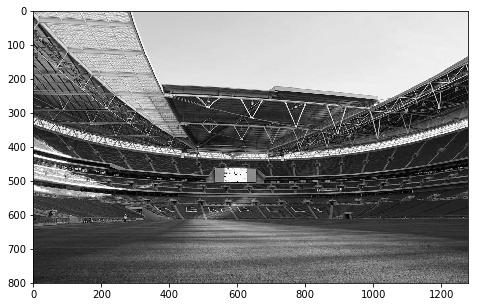

In [839]:
imagen = Image.open('C:/Users/Aldo/Pictures/Wembley.png') # Directorio de la imagen
imagenbn = imagen.convert('LA')
plt.figure(figsize = (10,5))
plt.imshow(imagenbn);

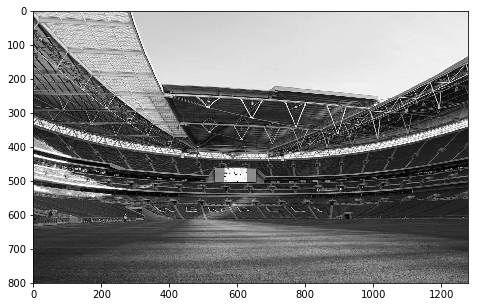

In [840]:
matriz = np.array(list(imagenbn.getdata(band=0)), float)
matriz.shape = (imagenbn.size[1], imagenbn.size[0])
matriz = np.matrix(matriz)
plt.figure(figsize = (10,5))
plt.imshow(matriz, cmap = 'gray');

In [841]:
U, s, V = np.linalg.svd(matriz)

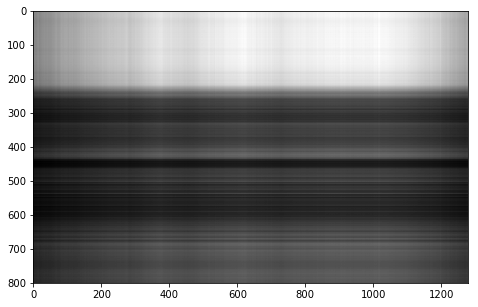

In [843]:
reconstruccion = np.matrix(U[:, :1]) * np.diag(s[:1]) * np.matrix(V[:1, :])
plt.figure(figsize = (10,5))
plt.imshow(reconstruccion, cmap = 'gray')

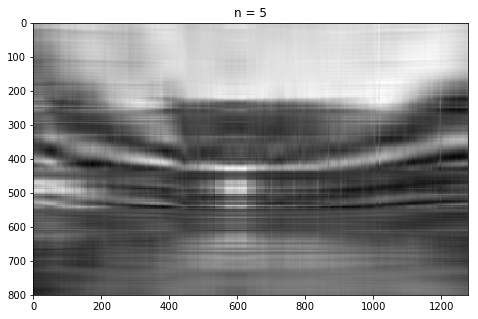

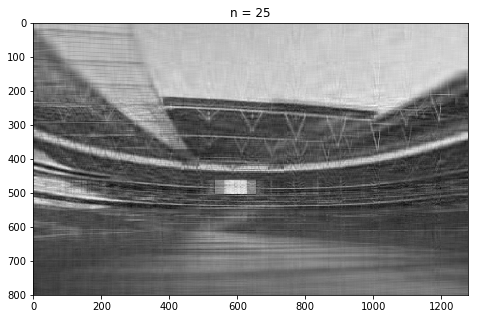

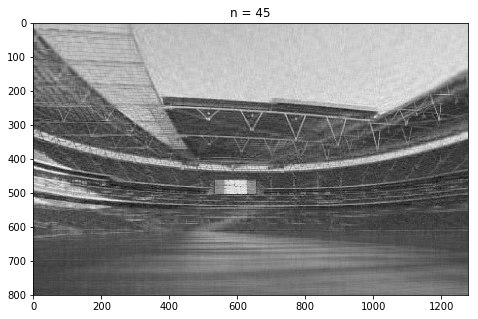

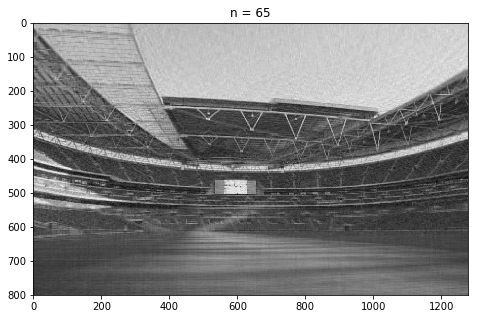

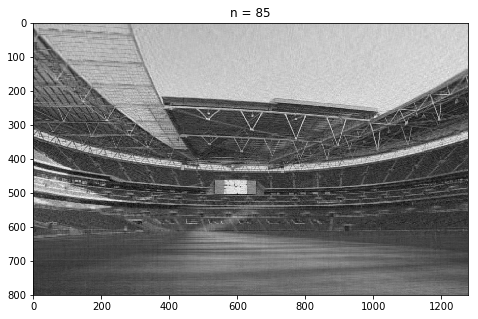

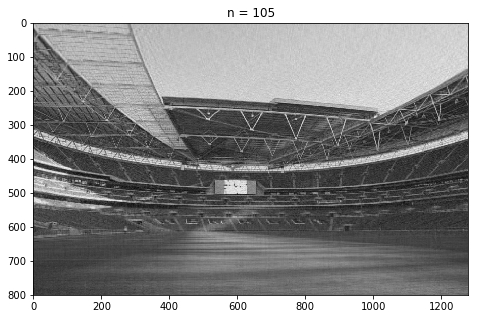

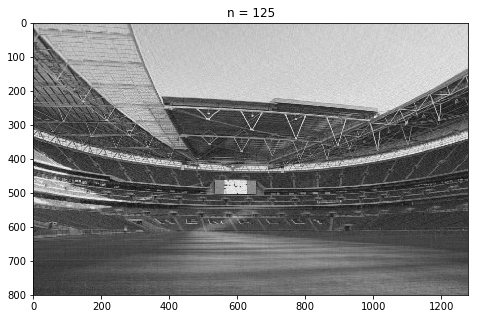

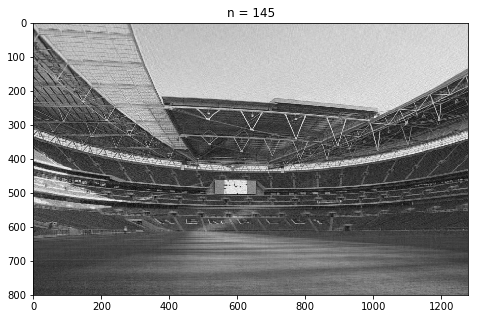

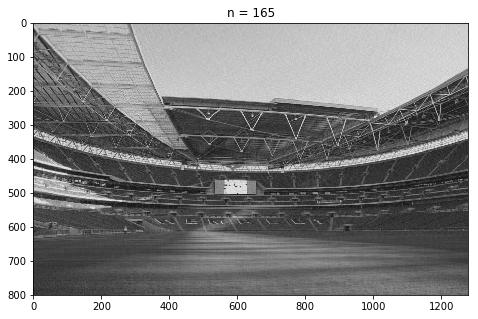

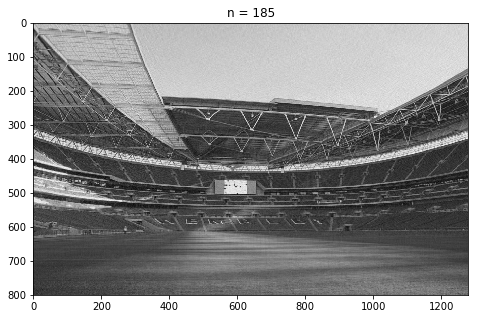

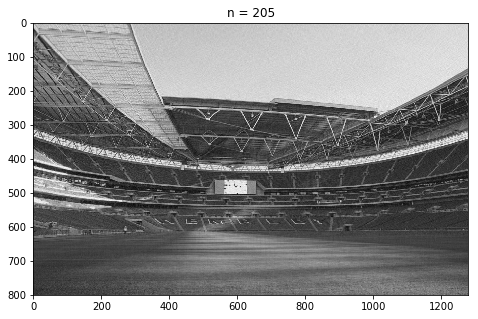

In [849]:
for k in range(5, 206,20):
    reconstruccion = np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(V[:k, :])
    plt.figure(figsize = (10,5))
    plt.imshow(reconstruccion, cmap='gray')
    title = "n = %s" % k
    plt.title(title)
    plt.show()

2 . Ahora veremos la aplicación a pseudoinversa y sistemas de ecuaciones
◦ Programar una función que dada cualquier matriz devuelva la pseudainversa usando la
descomposición SVD. Hacer otra función que resuelva cualquier sistema de ecuaciones de
la forma Ax=b usando esta pseudoinversa.
◦ Jugar con el sistema Ax=b donde A=[[1,1],[0,0]] y b puede tomar distintos valores. (a)
Observar que pasa si b esta en la imagen de A (contestar cuál es la imagen) y si no está
(ej. b = [1,1]). (b) Contestar, ¿la solución resultante es única? Si hay más de una solución,
investigar que carateriza a la solución devuelta. (c) Repetir cambiando A=[[1,1],[0,1e-
32]], ¿En este caso la solucíon es única? ¿Cambia el valor devuelto de x en cada posible
valor de b del punto anterior? 

In [864]:
# Version 1
def pseudoinv(matrix):
    U, s, V = np.linalg.svd(matrix)
    Uinv = np.linalg.inv(U)
    Vinv = np.linalg.inv(V)
    S = np.zeros((matrix.shape[1],matrix.shape[0]))
    s = np.diag(s**-1)
    s = np.diag(s)
    S[:matrix.shape[0],:matrix.shape[1]] = np.diag(s)
    matrixpseudoinv = np.dot(Vinv,np.dot(S,Uinv))
    return matrixpseudoinv

In [865]:
# Version 2
def pseudoinversa(matrix):
    U, s, V = np.linalg.svd(matrix)
    Uinv = np.linalg.inv(U)
    Vinv = np.linalg.inv(V)
    sinv = np.zeros((matrix.shape[1],matrix.shape[1]))
    sinv[:matrix.shape[0],:matrix.shape[1]] = np.diag(s)
    sinv = np.linalg.inv(sinv)
    sinv = np.diag(sinv)
    S = np.zeros((matrix.shape[1],matrix.shape[0]))
    S[:matrix.shape[0],:matrix.shape[1]] = np.diag(sinv)
    matrixpseudoinv = np.dot(Vinv,np.dot(S,Uinv))
    return matrixpseudoinv

In [866]:
A = np.array([[1,2,3,4],[112,31,12,123],[1,1202,0,1],[0,1,5,7],[1,1000,7,9]])

In [867]:
# Version 1
pseudoinv(A)

array([[  4.53821891e-01,   4.52202244e-03,  -1.98725072e-01,
         -6.16957322e-01,   2.38436667e-01],
       [ -2.29332448e-04,  -5.64253354e-06,   6.90226409e-04,
         -8.83561646e-05,   1.71069796e-04],
       [  6.29073917e-01,  -6.18160162e-03,  -3.15048196e-01,
         -6.92247631e-01,   3.78313661e-01],
       [ -4.74515421e-01,   4.61668601e-03,   2.11534518e-01,
          6.29352308e-01,  -2.54087930e-01]])

In [869]:
# Version 2
pseudoinversa(A)

array([[  4.53821891e-01,   4.52202244e-03,  -1.98725072e-01,
         -6.16957322e-01,   2.38436667e-01],
       [ -2.29332448e-04,  -5.64253354e-06,   6.90226409e-04,
         -8.83561646e-05,   1.71069796e-04],
       [  6.29073917e-01,  -6.18160162e-03,  -3.15048196e-01,
         -6.92247631e-01,   3.78313661e-01],
       [ -4.74515421e-01,   4.61668601e-03,   2.11534518e-01,
          6.29352308e-01,  -2.54087930e-01]])

In [870]:
#Comparar con la funcion de numpy
np.linalg.pinv(A)

array([[  4.53821891e-01,   4.52202244e-03,  -1.98725072e-01,
         -6.16957322e-01,   2.38436667e-01],
       [ -2.29332448e-04,  -5.64253354e-06,   6.90226409e-04,
         -8.83561646e-05,   1.71069796e-04],
       [  6.29073917e-01,  -6.18160162e-03,  -3.15048196e-01,
         -6.92247631e-01,   3.78313661e-01],
       [ -4.74515421e-01,   4.61668601e-03,   2.11534518e-01,
          6.29352308e-01,  -2.54087930e-01]])

In [871]:
B = np.dot(np.dot(A,pseudoinv(A)),A)

In [872]:
B

array([[  1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00],
       [  1.12000000e+02,   3.10000000e+01,   1.20000000e+01,
          1.23000000e+02],
       [  1.00000000e+00,   1.20200000e+03,  -1.59428026e-13,
          1.00000000e+00],
       [ -3.49720253e-15,   1.00000000e+00,   5.00000000e+00,
          7.00000000e+00],
       [  1.00000000e+00,   1.00000000e+03,   7.00000000e+00,
          9.00000000e+00]])

In [873]:
C = np.dot(np.dot(pseudoinv(A),A),pseudoinv(A))

In [875]:
C

array([[  4.53821891e-01,   4.52202244e-03,  -1.98725072e-01,
         -6.16957322e-01,   2.38436667e-01],
       [ -2.29332448e-04,  -5.64253354e-06,   6.90226409e-04,
         -8.83561646e-05,   1.71069796e-04],
       [  6.29073917e-01,  -6.18160162e-03,  -3.15048196e-01,
         -6.92247631e-01,   3.78313661e-01],
       [ -4.74515421e-01,   4.61668601e-03,   2.11534518e-01,
          6.29352308e-01,  -2.54087930e-01]])

In [876]:
# Version 1
def solucion(coef,resul):
    # Usando la funcion de pseudoinversa de Numpy
    coefinv = np.linalg.pinv(coef)
    if coef.shape[0] != resul.shape[0]:
            raise Exception("El numero de ecuaciones y resultados debe ser igual")
    soluciones = np.dot(coefinv,resul)
    return soluciones

In [877]:
# Version 2
def sols(coef,resul):
    # Usando la funcion construida de pseudoinversa
    coefinv = pseudoinv(coef)
    if coef.shape[0] != resul.shape[0]:
            raise Exception("El numero de ecuaciones y resultados debe ser igual")
    soluciones = np.dot(coefinv,resul)
    return soluciones

In [878]:
# x1 + x2 = b1
# 0 * x1 + 0 * x2 = b2
A = np.array([[1,1],[0,0]])

# Inciso a
# Si b esta en la imagen, seria b = (b1, 0)
# Tiene multiples soluciones, todas las x1 y x2 en los reales tales que
# x1 + x2 = b1
bsi = np.array([[5],[0]])

# Si b no esta en la imagen, b = (b1,b2) con b2 <> 0
# No deberia tener solucion, pues 0 * x1 + 0 * x2 = 0 <> b2
bno = np.array([[5],[1]])

In [879]:
# Version 1
# Utilizando la funcion de numpy para pseudoinversa
# El resultado no es solucion del sistema
solucion(A,bsi)

array([[ 2.5],
       [ 2.5]])

In [880]:
# Version 1
# Utilizando la funcion de numpy para pseudoinversa
# El resultado no es solucion del sistema
solucion(A,bno)

array([[ 2.5],
       [ 2.5]])

In [881]:
# Inciso b
# Dan la misma solucion para cada b
# Inconsistencia porque A es matriz singular
# Determinante = 0
# No tiene inversa
np.linalg.det(A)

0.0

In [882]:
# Version 2
sols(A,bsi)
# A matriz singular

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  import sys


array([[ nan],
       [ nan]])

In [883]:
# Version 2
sols(A,bno)
# A matriz singular

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  import sys


array([[ nan],
       [ nan]])

In [884]:
# Inciso c
# x1 + x2 = b1
# 0 * x1 + 1e-32 * x2 = b2
A = np.array([[1,1],[0,1e-32]])

# Deberia tener solucion unica
buno = np.array([[5],[1]])
bdos = np.array([[10],[0]])

In [885]:
# Version 1
# Utilizando la funcion de numpy para pseudoinversa
# El resultado no es solucion del sistema
# Cumple con la primera ecuacion
# No cumple con la segunda ecuacion
solucion(A,buno)

array([[ 2.5],
       [ 2.5]])

In [886]:
# Version 1
# Utilizando la funcion de numpy para pseudoinversa
# El resultado puede decirse que es solucion del sistema
# Cumple con la primera y la segunda, aproximadamente
# Si b2 = 0, puede decirse que cumple
solucion(A,bdos)

array([[ 5.],
       [ 5.]])

In [887]:
# Version 2
# El resultado no es solucion del sistema
# x1 = -x2
sols(A,buno)

array([[ -1.00000000e+32],
       [  1.00000000e+32]])

In [888]:
# Version 2
# El resultado es solucion del sistema
# Solucion unica
# Funciona si b2 = 0
sols(A,bdos)

array([[ 10.],
       [  0.]])

In [889]:
# Inconsistencia
# Determinante practicamente 0
np.linalg.det(A)

9.9999999999999308e-33

In [890]:
# Matrices diferentes a las del ejercicio
A = np.array([[1,2,3],[3,4,5],[5,10,1]])
B = np.array([[1],[1],[1]])

In [892]:
solucion(A,B)

array([[-0.71428571],
       [ 0.42857143],
       [ 0.28571429]])

In [893]:
sols(A,B)

array([[-0.71428571],
       [ 0.42857143],
       [ 0.28571429]])

In [894]:
# Matrices diferentes a las del ejercicio
A = np.array([[1,2],[4,5]])
B = np.array([[51],[3]])

In [895]:
solucion(A,B)

array([[-83.],
       [ 67.]])

In [896]:
sols(A,B)

array([[-83.],
       [ 67.]])